In [1]:
import pandas as pd
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup  # used for webscrapping
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jlod9\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
fin_url = 'https://finviz.com/quote.ashx?t='

In [3]:
tickers = [
         'IBM', 
         'ACN',
          ]

In [4]:
news_tables = {}
for ticker in tickers:
    url = fin_url + ticker
    req = Request(url, headers= {'user-agent' : 'my-app'})  # header allows us to actually download from the website
    response = urlopen(req)
    html = BeautifulSoup(response, 'html')   # pulling the source code from the website
    news_table = html.find(id = 'news-table')  # pulls the html object of the entire table for that ticker
    news_tables[ticker] = news_table

    
print(news_tables)  # this gives us the raw html data for the tables for each ticker

{'IBM': <table border="0" cellpadding="1" cellspacing="0" class="fullview-news-outer" id="news-table" width="100%">
<tr><td align="right" style="white-space:nowrap" width="130">Aug-19-21 08:00AM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://finance.yahoo.com/news/american-council-education-validates-ibm-120000605.html" target="_blank">American Council on Education Validates IBM Apprenticeship Program, Recommends College Credit to Participants</a></div><div class="news-link-right"><span style="color:#aa6dc0;font-size:9px"> PR Newswire</span></div></div></td></tr>
<tr><td align="right" style="white-space:nowrap" width="130">Aug-18-21 11:30AM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://finance.yahoo.com/news/ibm-ibm-1-8-since-153003279.html" target="_blank">IBM (IBM) Up 1.8% Since Last Earnings Report: Can It Continue?</a></div><div cl

In [5]:
parsed_data = []
for ticker, news_table in news_tables.items():
    for row in news_table.findAll('tr'):
        title = row.a.get_text()
        date_data = row.td.text.split(' ')  # we have to account for the fact that the date format varies slightly for different rows
        if len(date_data) == 1:
            time = date[0]
        else:
            date = date_data[0]
            time = date_data[1]
        parsed_data.append([ticker, date, time, title])
        
print(parsed_data)

[['IBM', 'Aug-19-21', '08:00AM\xa0\xa0', 'American Council on Education Validates IBM Apprenticeship Program, Recommends College Credit to Participants'], ['IBM', 'Aug-18-21', '11:30AM\xa0\xa0', 'IBM (IBM) Up 1.8% Since Last Earnings Report: Can It Continue?'], ['IBM', 'Aug-17-21', '04:12PM\xa0\xa0', 'Big tech conferences are coming back, but smaller ones see a different path'], ['IBM', 'Aug-13-21', '06:35PM\xa0\xa0', 'IBM to allow only fully vaccinated to return to U.S. offices from September 7'], ['IBM', 'Aug-13-21', 'A', 'IBM to allow only fully vaccinated to return to U.S. offices from Sept. 7'], ['IBM', 'Aug-13-21', 'A', '3 High-Yield Tech Stocks to Buy in August'], ['IBM', 'Aug-12-21', '09:44AM\xa0\xa0', 'Palantir Raises Sales Forecast on Strong Government Uptake'], ['IBM', 'Aug-10-21', '10:12AM\xa0\xa0', '12 Best Artificial Intelligence Stocks To Invest In Right Now'], ['IBM', 'Aug-09-21', '10:26AM\xa0\xa0', 'IBM (NYSE:IBM) is Stabilizing and Needs to Perform Before Investors Re

In [6]:
df = pd.DataFrame(parsed_data, columns = ['ticker', 'date', 'time', 'title'])

In [7]:
vader = SentimentIntensityAnalyzer()  # this is what we use to decide how positive or negative each headline is

In [8]:
df['compound'] = df['title'].apply(lambda x: vader.polarity_scores(x)['compound'])

In [9]:
print(df.head(20))

   ticker       date       time  \
0     IBM  Aug-19-21  08:00AM     
1     IBM  Aug-18-21  11:30AM     
2     IBM  Aug-17-21  04:12PM     
3     IBM  Aug-13-21  06:35PM     
4     IBM  Aug-13-21          A   
5     IBM  Aug-13-21          A   
6     IBM  Aug-12-21  09:44AM     
7     IBM  Aug-10-21  10:12AM     
8     IBM  Aug-09-21  10:26AM     
9     IBM  Aug-07-21  06:06AM     
10    IBM  Aug-06-21  07:00PM     
11    IBM  Aug-04-21  12:25PM     
12    IBM  Aug-04-21          A   
13    IBM  Aug-04-21          A   
14    IBM  Aug-04-21          A   
15    IBM  Aug-04-21          A   
16    IBM  Aug-03-21  09:00AM     
17    IBM  Aug-01-21  07:45AM     
18    IBM  Jul-31-21  03:42AM     
19    IBM  Jul-30-21  04:04PM     

                                                title  compound  
0   American Council on Education Validates IBM Ap...    0.7096  
1   IBM (IBM) Up 1.8% Since Last Earnings Report: ...    0.0000  
2   Big tech conferences are coming back, but smal...    0.0000  


In [10]:
df['date'] = pd.to_datetime(df.date).dt.date

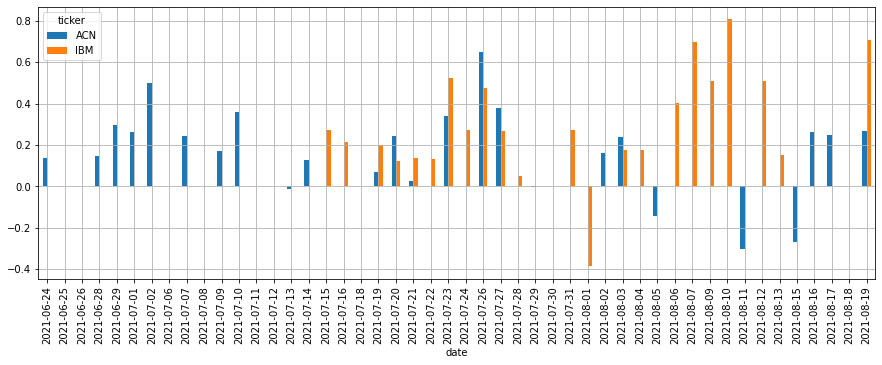

In [11]:
plt.rcParams["figure.figsize"] = (15,5)
mean_df = df.groupby(['ticker', 'date']).mean()
mean_df = mean_df.unstack()
mean_df = mean_df.xs('compound', axis  = 'columns').transpose()
mean_df.plot(kind='bar', grid='True')
plt.show()

## Accenture
- Accentures highest point is 26th of July: On this day, an article was posted called "Pega and Accenture Join Forces to Help Transform Australian Defence Force Postings". Words like "help" and "join" are positive, as well as seeing the words "join forces" together play a part in explaining the high positive sentiment.


- Accentures lowest point was August 11th:we see the effect of a ransomware attack on Accenture on the 11th of August. On this day we have 2 articles from Reuters detailing the attack as well as 3 other articles by separate newspapers. Negative words like "sinks" and "attack" are used which explains the sentiment given by the algorithm.

## IBM


- IBMs highest point was August 8th: On this day they featured in an article called "12 Best Artificial Intelligence Stocks To Invest In Right Now". Positive words like "best" and "invest" are the main drivers here. **It is worth mentioning that the Sentiment Analysis algorithm not only classifies a word as positve or negative but also gives it a score.** Words like "best" (used above) are given a higher score than words like "good".


- IBMs lowest point was 1st of August: On this day they an article was published called "Why Don't Investors Care About IBM's Chipmaking Breakthroughs?" This one was interesting. My intuition from the article headline was that it wasn't particularly negative. On reading the article itself, it talks about how investors shrugged off the IBM claim that they have developed the world's first 2nm chip technology. It also says another company TSMC claims to be working on even smaller chips. It turned out to be a surprisingly scathing article I wouldn't have given too much thought on without the Sentiment Analyser.

This is far from a perfect Sentiment Analyser but it is useful in pointing me in the direction of certain headlines where I can investigate the coverage of a company on a given day.